In [1]:
import tensorflow as tf
import tensorflow.keras.datasets.cifar10
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense
import cv2

C:\Users\Yigit\miniconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [ ]:
# VERİ SETİMİZİ ÇEKTİK

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

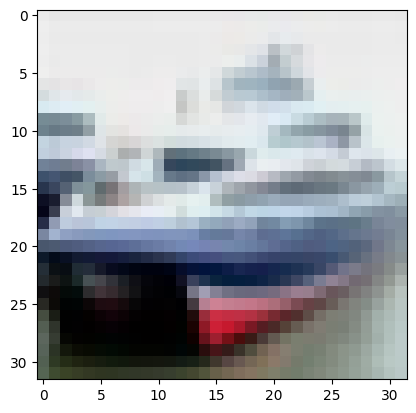

In [3]:
plt.imshow(x_test[1])

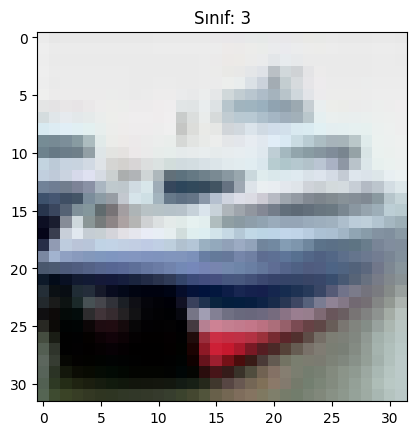

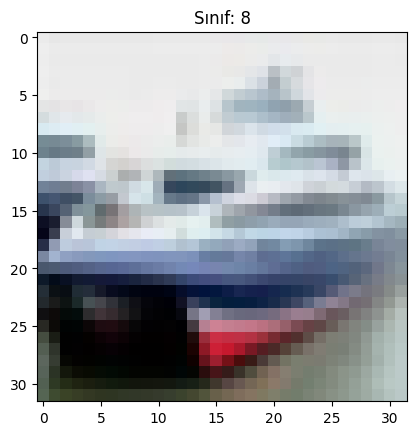

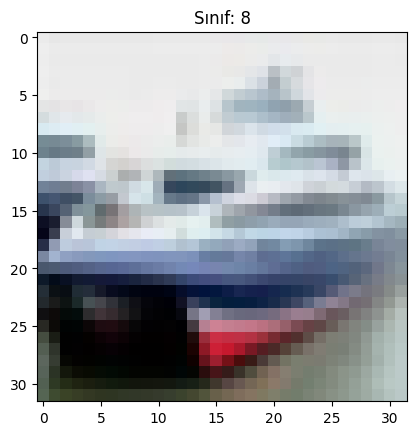

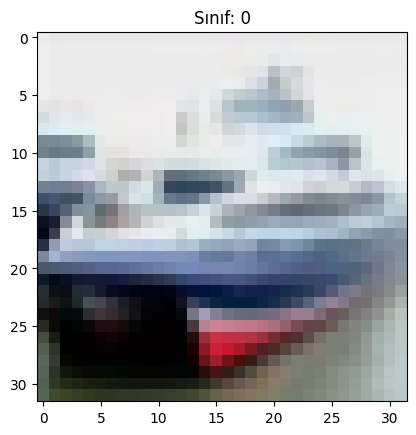

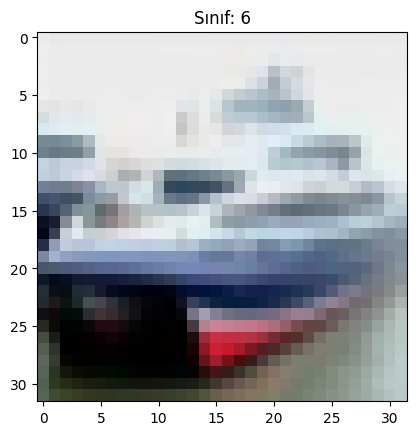

In [4]:
for i in range(5):
    plt.imshow(x_test[1])
    plt.title("Sınıf: "+ str(y_test[i][0]))
    plt.show()

In [ ]:
# X VE Y VERİLERİMİZİ BİRLEŞTİRDİK

In [5]:
x_data = np.concatenate((x_train , x_test) , axis=0)
y_data = np.concatenate((y_train , y_test) , axis=0)

In [ ]:
#  TEST VE EĞİTİM OLARAK BÖLDÜK

In [6]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size=0.2 , random_state=42)

In [ ]:
# RESİM DEĞERLERİMİZİN RENK TONU 0-255 ARASINDA OLDUĞU İÇİN NORMALİZE EDERKEN RENKLERİMİZİ 255 E BÖLDÜK

In [7]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
# ETİKET VERİLERİMİZİ SINIF SAYIMIZI VEREREK KATEGORİZE ETTİK

In [8]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train , num_classes)
y_test = keras.utils.to_categorical(y_test , num_classes)

In [ ]:
# GEREKLİ FİLTRELERİ UYGULADIK , MODELİMİZİ DERİN ÖĞRENME ALGORİTMASINDAN GEÇİRDİK

In [9]:
model = Sequential()

model.add(Conv2D(32,(3,3) , activation="relu" , padding="same" , input_shape=x_train.shape[1:]))


model.add(Conv2D(32,(3,3) , activation="relu"))


model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3) , activation="relu" , padding="same"))
model.add(Conv2D(64,(3,3) , activation="relu"))


model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(num_classes , activation="softmax"))

In [10]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" , metrics=["accuracy"])

In [ ]:
# DERİN ÖĞRENMEDE İŞLEDİĞİMİZ VERİLERİN ÖZETİNİ ÇIKARDIK

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [ ]:
# MODELİMİZİ FİT ETTİK

In [12]:
batch_size = 128
epochs= 30
model.fit(x_train , y_train , batch_size=batch_size , epochs=epochs , validation_data = (x_test,y_test))

Epoch 1/30
375/375 [==============================] - 115s 299ms/step - loss: 1.5179 - accuracy: 0.4459 - val_loss: 1.2560 - val_accuracy: 0.5479
Epoch 2/30
375/375 [==============================] - 91s 243ms/step - loss: 1.0920 - accuracy: 0.6143 - val_loss: 1.0180 - val_accuracy: 0.6415
Epoch 3/30
375/375 [==============================] - 91s 244ms/step - loss: 0.8927 - accuracy: 0.6883 - val_loss: 0.9020 - val_accuracy: 0.6838
Epoch 4/30
375/375 [==============================] - 86s 230ms/step - loss: 0.7725 - accuracy: 0.7305 - val_loss: 0.8529 - val_accuracy: 0.6987
Epoch 5/30
375/375 [==============================] - 85s 226ms/step - loss: 0.6677 - accuracy: 0.7681 - val_loss: 0.7642 - val_accuracy: 0.7351
Epoch 6/30
375/375 [==============================] - 85s 226ms/step - loss: 0.5647 - accuracy: 0.8025 - val_loss: 0.8029 - val_accuracy: 0.7323
Epoch 7/30
375/375 [==============================] - 86s 229ms/step - loss: 0.4703 - accuracy: 0.8346 - val_loss: 0.8220 - val_a

In [13]:
scores = model.evaluate(x_test,y_test, verbose=1)
print("test loss: " , scores[0])
print("test accuracy: " , scores[1])

375/375 [==============================] - 4s 11ms/step - loss: 2.0237 - accuracy: 0.7318
test loss:  2.023684501647949
test accuracy:  0.7317500114440918
